## Here we combine data from 2 datasets, the Hotel data and the Review data to predict the price based on multiple factors

## The datasets are scrapped in the previous steps

In [160]:
#!pip install seaborn
#!pip install category_encoders

In [161]:
import warnings
warnings.filterwarnings("ignore")#Ignoring warnings to clean up the notebook
import json
import os
import pandas as pd
from dateutil import parser
import tqdm
import numpy as np
np.__version__
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
#Mention the folder with the .json files
data_path = 'Data/'

In [163]:
key_list_hotel=['name', 'location', 'price', 'room_type', 'link', 'review_score', 'review_category', 'no_of_reviews', 
                'amenities', 'ratings', 'reviews_list']

key_list_ratings_hotel=['Best Rating', 'Staff', 'Facilities', 'Cleanliness', 'Comfort', 'Value for money', 'Location', 
                       'Free WiFi']

data_hotel = pd.DataFrame(columns=['Hotel_Name', 'City', 'Distance_for_Center', 'Chepest_Room_Price_$', 'Cheapest_Room_Type', 
                            'Average_Hotel_Rating', 'Review_category', 'No_of_Reviews', 'ammenities', 'Best_Rating', 
                            'Staff_Rating', 'Facilities_Rating', 'Cleanliness_Rating', 'Confort_Rating', 
                            'Value_for_Money_Rating', 'Location_rating', 'Free_Wifi_Rating'])


data_reviews = pd.DataFrame(columns=['Hotel_Name', 'Reviewer_Name', 'Reviewer_Country', 'Room_Type', 'Review_Month', 'Review_Year',
                                    'Stay_Period_Nights', 'Stay_Start_Date', 'Reviewer_Group_Type', 'Main_Review', 
                                    'Review_Rating', 'Review_Likes', 'Review_Dislikes'])

In [164]:
#Loading Hotel Data
for i in os.listdir(data_path):
    if '.json' in i:
        f=open(data_path+i)
        tmp=json.load(f)
        for city in tmp:
            city=tmp['city_name']
            for hotel in tmp['hotel_list']: 
                for key in key_list_hotel:
                    if key not in hotel.keys():
                        hotel['key']=None

                    for sub_key in key_list_ratings_hotel:
                        if sub_key not in hotel['ratings'].keys():
                            hotel['ratings'][sub_key] = None

                data_hotel=data_hotel.append({'Hotel_Name':hotel['name'],
                          'City': city,
                          'Distance_for_Center':hotel['location'],
                          'Chepest_Room_Price_$':hotel['price'],
                          'Cheapest_Room_Type':hotel['room_type'], 
                          'Average_Hotel_Rating':hotel['review_score'],
                          'Review_category':hotel['review_category'],
                          'No_of_Reviews':hotel['no_of_reviews'],
                          'ammenities':hotel['amenities'],
                          'Best_Rating':hotel['ratings']['Best Rating'],
                          'Staff_Rating':hotel['ratings']['Staff'],
                          'Facilities_Rating':hotel['ratings']['Facilities'],
                          'Cleanliness_Rating':hotel['ratings']['Cleanliness'],
                          'Confort_Rating':hotel['ratings']['Comfort'], 
                          'Value_for_Money_Rating':hotel['ratings']['Value for money'],
                          'Location_rating':hotel['ratings']['Location'], 
                          'Free_Wifi_Rating':hotel['ratings']['Free WiFi']}, ignore_index=True)

del tmp, key, sub_key, f, i, city, hotel, key_list_hotel, key_list_ratings_hotel

In [165]:
data_hotel['Review_category'].value_counts()

Review score    474
Good            470
Very Good       418
Excellent       170
Wonderful       168
Exceptional     156
Name: Review_category, dtype: int64

In [166]:
#Data Sanitization
data_hotel['Distance_for_Center']= data_hotel['Distance_for_Center'].str.split(' ').str[0].astype(float)
data_hotel['No_of_Reviews']= data_hotel['No_of_Reviews'].str.split(' ').str[0].str.replace('\,','').astype(int)
data_hotel['Chepest_Room_Price_$']= data_hotel['Chepest_Room_Price_$'].str.strip('$').str.replace(',','').astype(float)
data_hotel['City']=data_hotel['City'].apply(lambda x: 'San Francisco' if len(x)==4 else x)
data_hotel['City']=data_hotel['City'].apply(lambda x: 'San Diego' if 'San Diego' in x else x)
data_hotel['City']=data_hotel['City'].apply(lambda x: 'Los Angeles' if 'Los Angeles' in x else x)
data_hotel['ammenities_count']=data_hotel['ammenities'].str.len()


In [167]:
data_hotel.head()

,Hotel_Name,City,Distance_for_Center,Chepest_Room_Price_$,Cheapest_Room_Type,Average_Hotel_Rating,Review_category,No_of_Reviews,ammenities,Best_Rating,Staff_Rating,Facilities_Rating,Cleanliness_Rating,Confort_Rating,Value_for_Money_Rating,Location_rating,Free_Wifi_Rating,ammenities_count
0,Hyatt Centric Fisherman's Wharf San Francisco,San Francisco,1.3,403.0,Standard King Room,8.1,Very Good,1305,"[Outdoor swimming pool, Private Parking, Free ...",10.0,8.6,8.3,8.7,8.7,7.6,9.2,8.3,10
1,Holiday Inn Express Hotel & Suites Fisherman's...,San Francisco,1.4,458.0,King Room - Mobility Access/Roll in Shower - N...,8.4,Very Good,828,"[Private Parking, Free WiFi, Family rooms, Non...",10.0,8.9,8.5,8.9,8.9,7.8,9.3,8.9,10
2,"InterContinental Mark Hopkins San Francisco, a...",San Francisco,0.3,435.0,Cozy Queen Room,8.1,Very Good,954,"[Private Parking, WiFi, Family rooms, Non-smok...",10.0,8.8,8.0,8.6,8.6,7.7,9.1,None,10
3,Kasa La Monarca San Francisco,San Francisco,0.3,275.0,Deluxe Queen Room (Self Check-in with Virtual ...,7.8,Good,142,"[Free WiFi, Non-smoking rooms, Facilities for ...",10.0,7.7,8.0,8.4,8.7,8.0,8.5,None,5
4,Warwick San Francisco,San Francisco,0.2,338.0,Deluxe Queen Room,7.2,Good,1209,"[Private Parking, Free WiFi, Non-smoking rooms...",10.0,8.2,7.4,7.8,7.8,7.2,8.1,None,10


In [168]:
data_hotel['Review_category'].value_counts()

Review score    474
Good            470
Very Good       418
Excellent       170
Wonderful       168
Exceptional     156
Name: Review_category, dtype: int64

In [169]:
data_hotel.describe()

,Distance_for_Center,Chepest_Room_Price_$,No_of_Reviews,Best_Rating,ammenities_count
count,1856.000000,1856.000000,1856.000000,1744.0,1856.000000
mean,7.820366,538.959052,396.409483,10.0,6.909483
std,30.036775,475.376312,593.608858,0.0,2.802078
min,0.100000,86.000000,1.000000,10.0,0.000000
25%,1.000000,280.000000,9.000000,10.0,4.000000
50%,4.000000,403.000000,151.000000,10.0,7.000000
75%,8.400000,630.000000,497.750000,10.0,10.000000
max,500.000000,4926.000000,3969.000000,10.0,10.000000


In [170]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel_Name              1856 non-null   object 
 1   City                    1856 non-null   object 
 2   Distance_for_Center     1856 non-null   float64
 3   Chepest_Room_Price_$    1856 non-null   float64
 4   Cheapest_Room_Type      1740 non-null   object 
 5   Average_Hotel_Rating    1794 non-null   object 
 6   Review_category         1856 non-null   object 
 7   No_of_Reviews           1856 non-null   int64  
 8   ammenities              1856 non-null   object 
 9   Best_Rating             1744 non-null   float64
 10  Staff_Rating            1738 non-null   object 
 11  Facilities_Rating       1738 non-null   object 
 12  Cleanliness_Rating      1738 non-null   object 
 13  Confort_Rating          1738 non-null   object 
 14  Value_for_Money_Rating  1738 non-null   

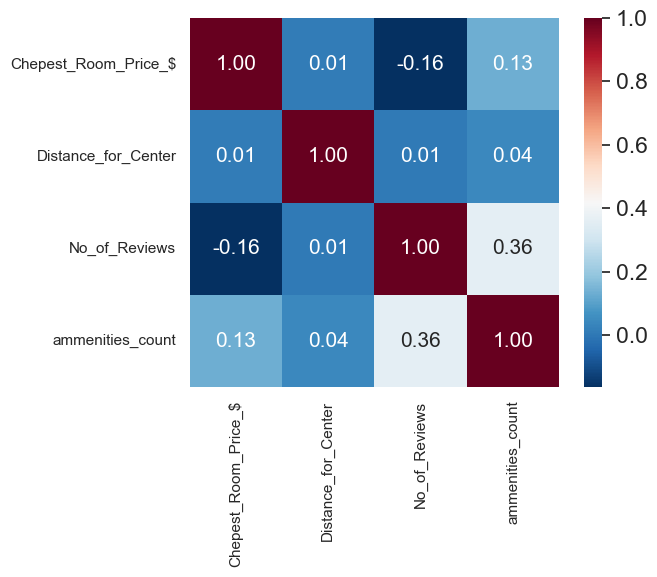

In [171]:
#Plotting Correlation with non Null variables
fig, ax = plt.subplots()
cols = ['Chepest_Room_Price_$', 'Distance_for_Center', 'No_of_Reviews', 'ammenities_count']
cm = np.corrcoef(data_hotel[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,)

sns.set(font_scale=1)
ax.set_ylim(len(cols), 0) 
plt.show()

## Prediction using Multiple Linear Regression

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)

In [192]:
data_hotel['City'].value_counts()

Los Angeles      764
San Diego        626
San Francisco    416
Sacramento        50
Name: City, dtype: int64

In [193]:
X = data_hotel[[ 'Distance_for_Center',
       'Average_Hotel_Rating',
       'No_of_Reviews', 'Best_Rating', 'Staff_Rating',
       'Facilities_Rating', 'Cleanliness_Rating', 'Confort_Rating',
       'Value_for_Money_Rating', 'Location_rating', 'Free_Wifi_Rating',
       'ammenities_count']]
Y = data_hotel[['Chepest_Room_Price_$']]

In [194]:
#one Hot Encoding the city and Review categories
Review_category= encoder.fit_transform(data_hotel[['Review_category']])
City = encoder.fit_transform(data_hotel[['City']])

In [195]:
#Concatinating back to X
X=pd.concat([X,Review_category,City],axis=1)

In [196]:
#Our dataset has missing values, so replacing them
X.isnull().values.any()

True

In [197]:
#Replacing missing values with median
for i in X.columns:
    X[i] = X[i].fillna(X[i].median())

In [198]:
#No Null Values Now
X.isnull().values.any()

False

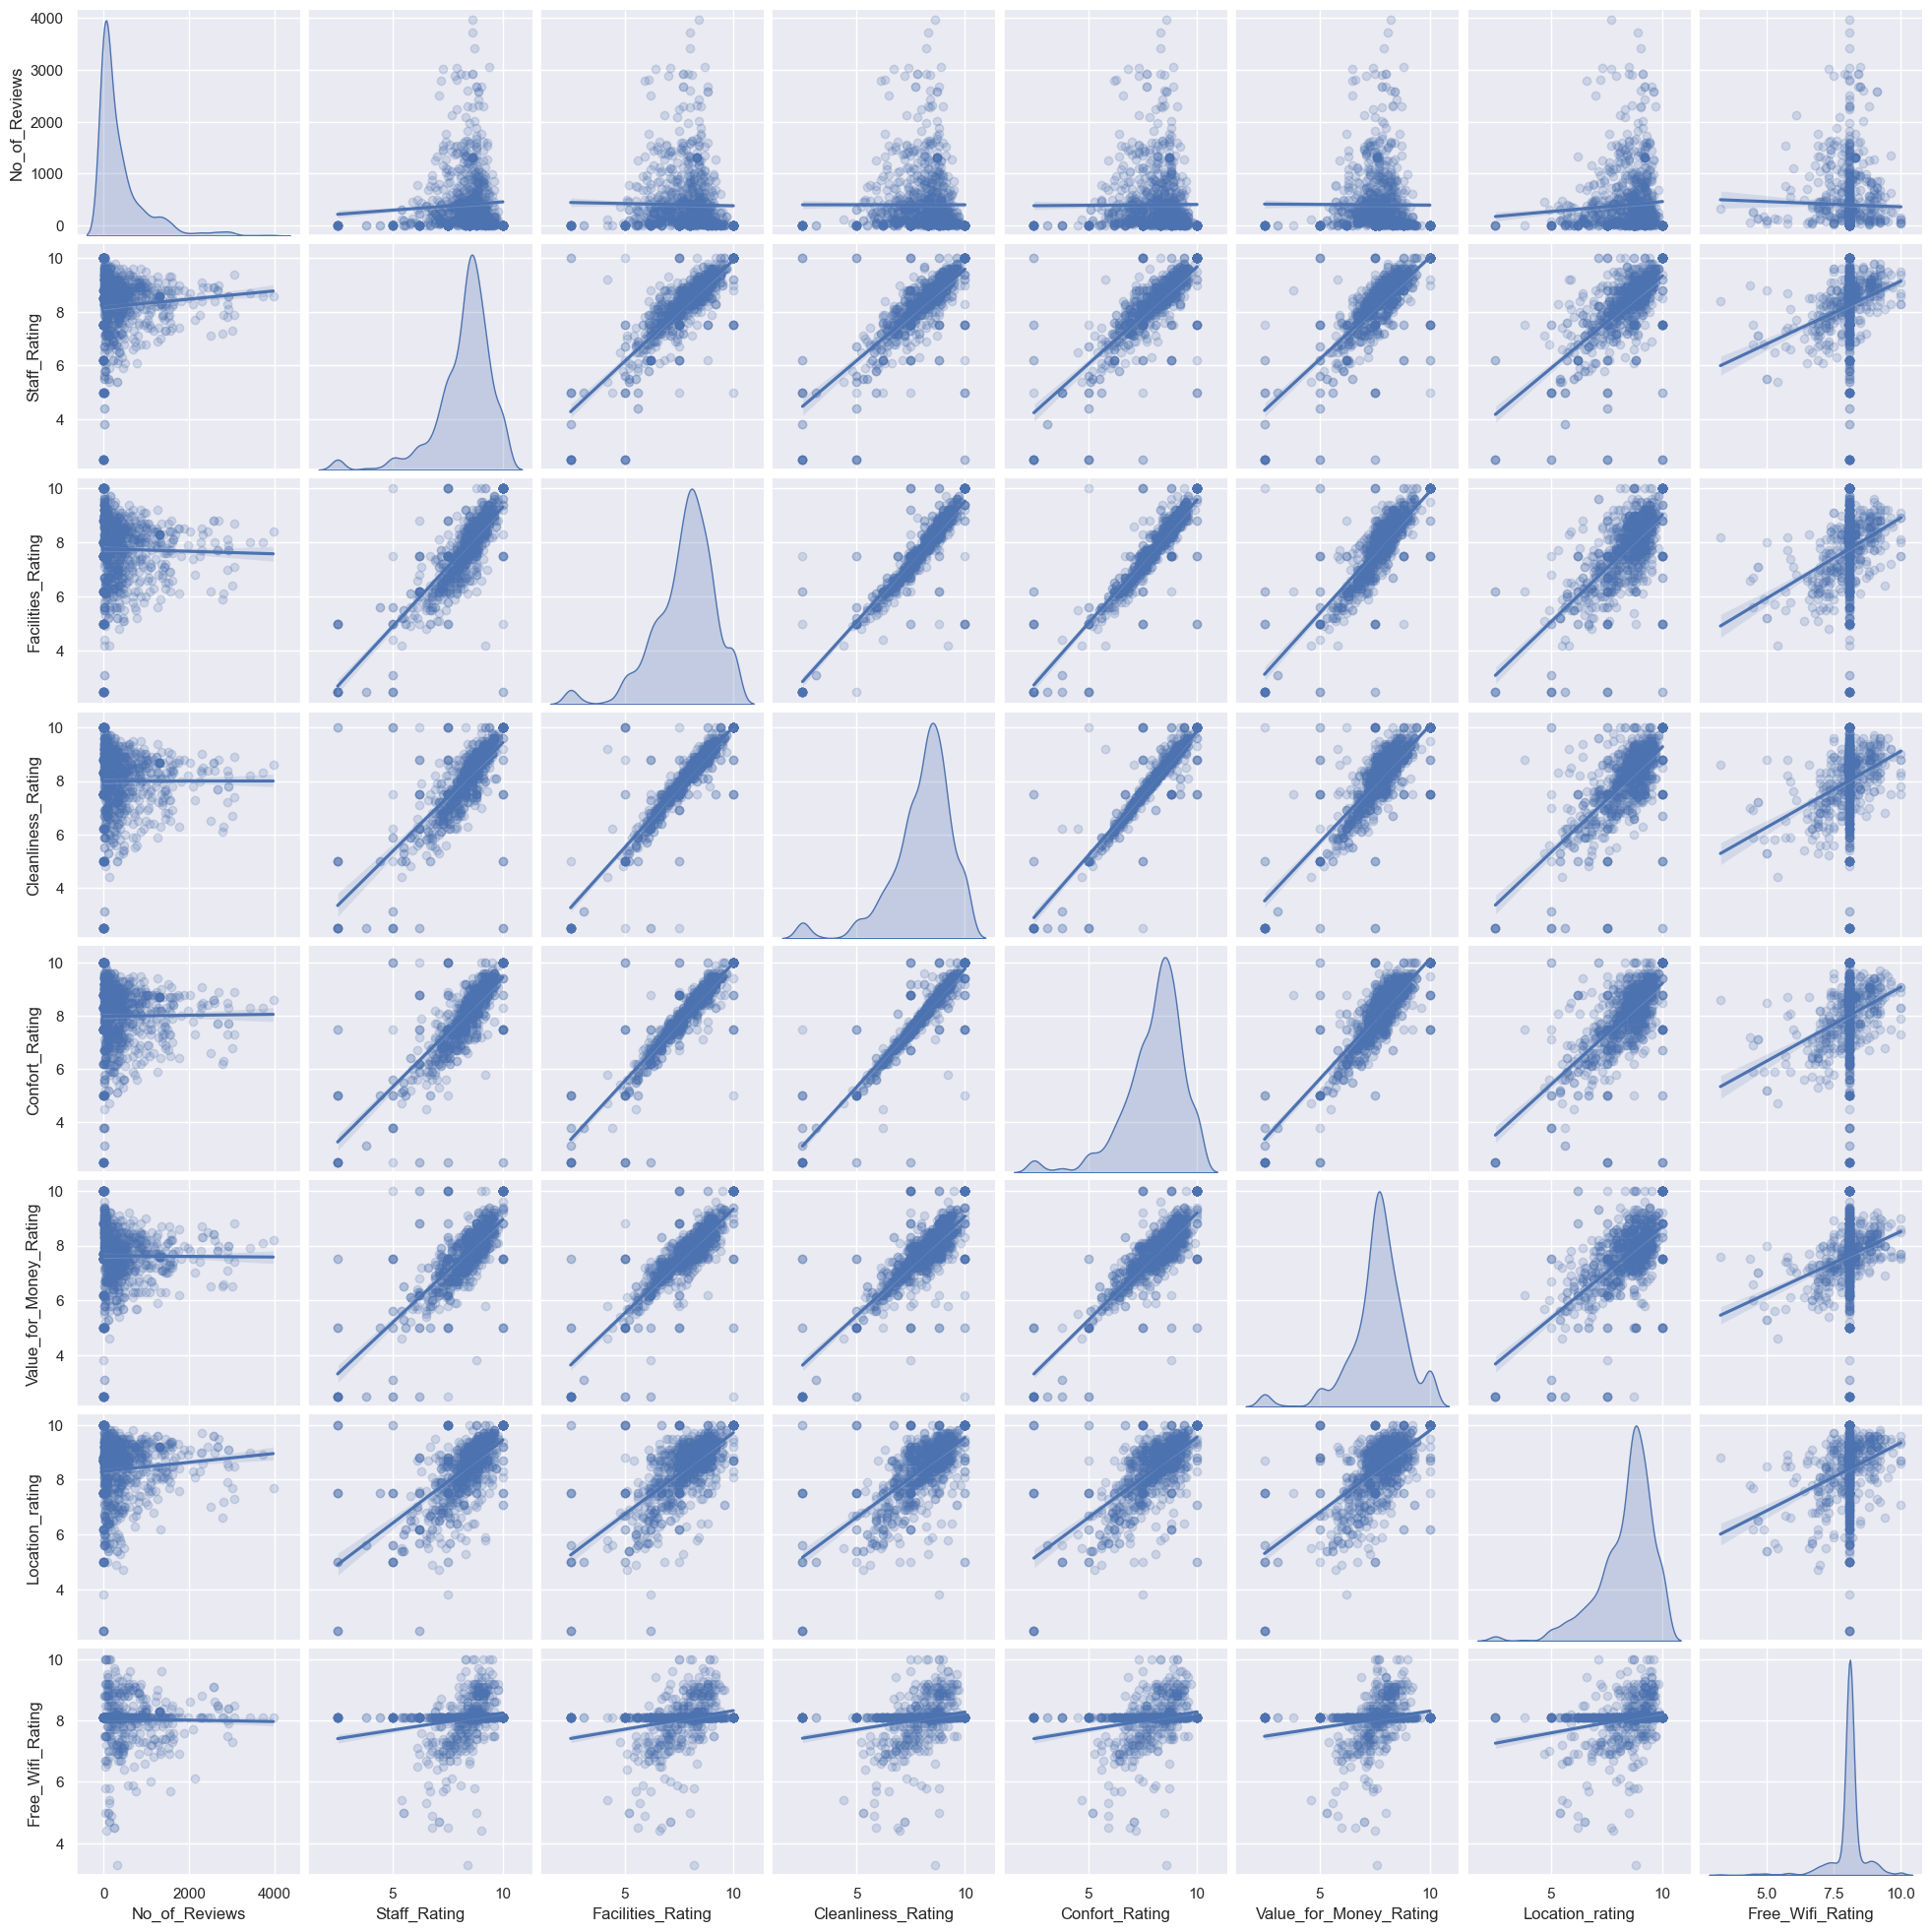

In [199]:
#Plotting Training featires against prediction variables to see the correlation
import seaborn as sns

train_dataset = X.copy()
train_dataset.insert(0, 'Chepest_Room_Price_$', Y)
_ = sns.pairplot(
    train_dataset[[
       'Average_Hotel_Rating',
       'No_of_Reviews', 'Staff_Rating',
       'Facilities_Rating', 'Cleanliness_Rating', 'Confort_Rating',
       'Value_for_Money_Rating', 'Location_rating', 'Free_Wifi_Rating']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})


In [200]:
#Split to Test Train sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [201]:
#Shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

X_train: (1484, 22)
X_test: (372, 22)
Y_train: (1484, 1)
Y_test: (372, 1)


In [202]:
#Train the Model
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [203]:
#Predictions
Y_pred=lr.predict(X_test)
Y_pred

array([[ 315.00667684],
       [1061.10112205],
       [ 497.60307641],
       [ 872.13914227],
       [   4.88464453],
       [ 287.5810791 ],
       [ 392.58364587],
       [ 776.16352871],
       [ 314.34454383],
       [ 597.53682695],
       [ 776.16352871],
       [ 343.23495077],
       [ 554.73397593],
       [ 748.79115729],
       [ 339.26105113],
       [ 782.54812429],
       [ 356.46242841],
       [ 581.38575668],
       [ 581.07977473],
       [ 244.37684714],
       [ 349.26802961],
       [ 579.28978309],
       [ 132.06894022],
       [ 787.61755746],
       [ 721.60316939],
       [ 513.97913312],
       [ 651.65593382],
       [ 573.43203412],
       [ 643.82582284],
       [ 713.31427312],
       [ 214.65791654],
       [ 320.94191934],
       [ 604.25153514],
       [ 520.3602255 ],
       [ 833.05317954],
       [ 644.18102397],
       [ 508.48691773],
       [ 806.70322243],
       [ 500.27972819],
       [ 587.35972499],
       [ -44.41785671],
       [ 597.454

In [204]:
#Mean squared error
print("Mean squared error: %.2f" % (np.mean((Y_pred - Y_test) ** 2)/len(X_test)))

Mean squared error: 113.83


In [205]:
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: [51.58962099]
Coefficients: [[-5.31463597e-01 -1.43040498e+02 -9.41587365e-02  1.13686838e-13
  -7.31800964e+01 -1.48471106e+01  1.75894362e+01  1.55922624e+02
  -5.65933399e+01  1.11952875e+02  3.17455908e+01  3.38314736e+01
  -5.95189805e+01 -1.58516035e+02 -2.67157591e+00  2.54838741e+02
  -2.60940281e+02  2.26808132e+02 -8.92200611e+01  8.98794062e+01
   1.21110777e+01 -1.27704228e+01]]


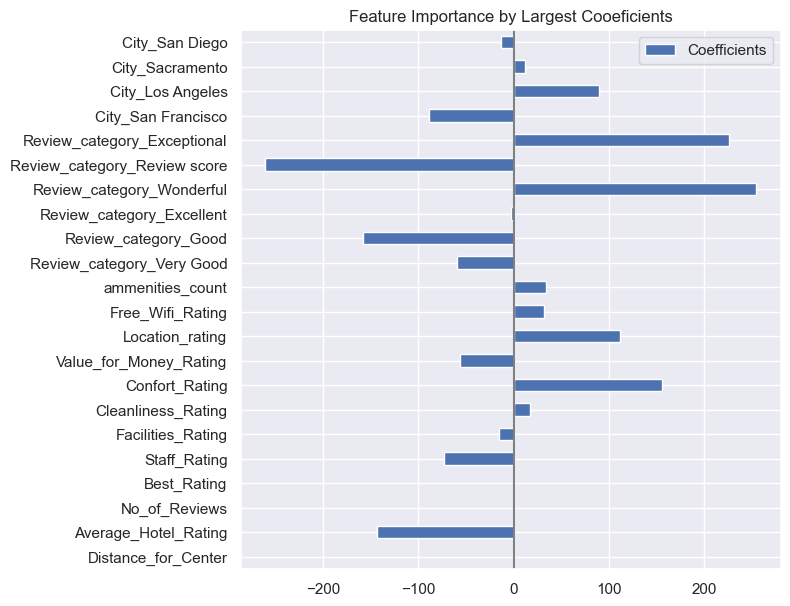

In [206]:
coefs = pd.DataFrame(
   lr.coef_.T,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importance by Largest Cooeficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [222]:
X_train.columns.values.tolist()

['Distance_for_Center',
 'Average_Hotel_Rating',
 'No_of_Reviews',
 'Best_Rating',
 'Staff_Rating',
 'Facilities_Rating',
 'Cleanliness_Rating',
 'Confort_Rating',
 'Value_for_Money_Rating',
 'Location_rating',
 'Free_Wifi_Rating',
 'ammenities_count',
 'Review_category_Very Good',
 'Review_category_Good',
 'Review_category_Excellent',
 'Review_category_Wonderful',
 'Review_category_Review score',
 'Review_category_Exceptional',
 'City_San Francisco',
 'City_Los Angeles',
 'City_Sacramento',
 'City_San Diego']

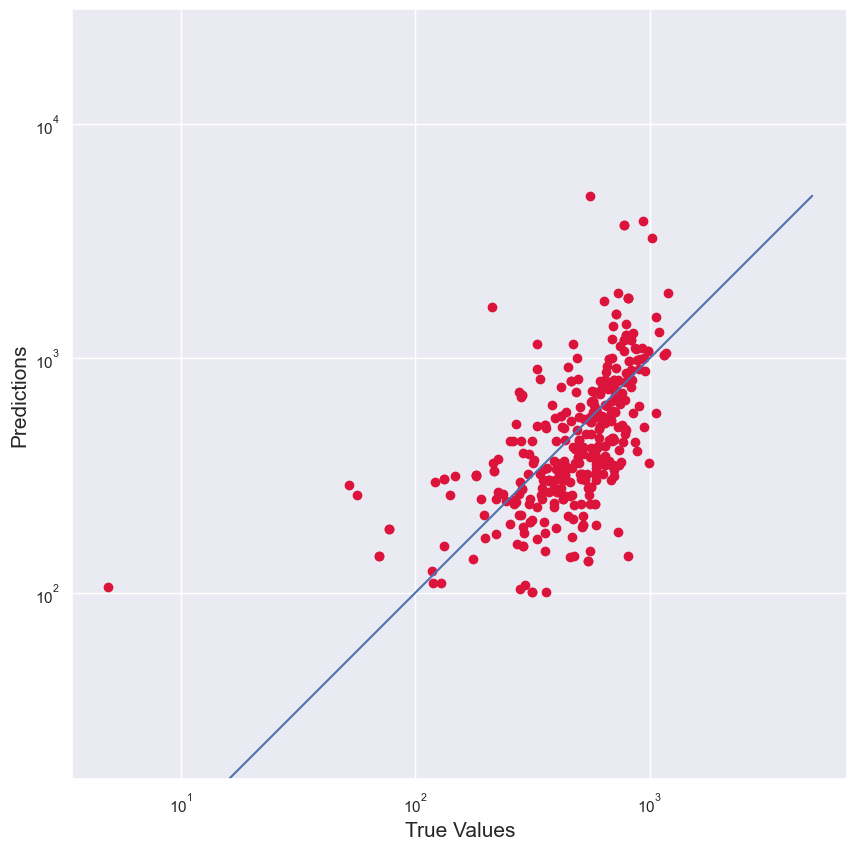

In [207]:
# Plotting the true vs predicted values to see if they have a linear relationship
plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test.values.tolist()))
p2 = min(min(Y_pred), min(Y_test.values.tolist()))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [249]:
#Top Important features
coeff, features = zip(*sorted(zip(list(abs(lr.coef_[0])),X_train.columns.values.tolist()),reverse=True))
print(features)

('Review_category_Review score', 'Review_category_Wonderful', 'Review_category_Exceptional', 'Review_category_Good', 'Confort_Rating', 'Average_Hotel_Rating', 'Location_rating', 'City_Los Angeles', 'City_San Francisco', 'Staff_Rating', 'Review_category_Very Good', 'Value_for_Money_Rating', 'ammenities_count', 'Free_Wifi_Rating', 'Cleanliness_Rating', 'Facilities_Rating', 'City_San Diego', 'City_Sacramento', 'Review_category_Excellent', 'Distance_for_Center', 'No_of_Reviews', 'Best_Rating')


## Top Important features are 
### 1. Review Category
### 2. Comfort Rating
### 3. Location Rating
### 4. City
### 5. Staff Rating